In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models, Input

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

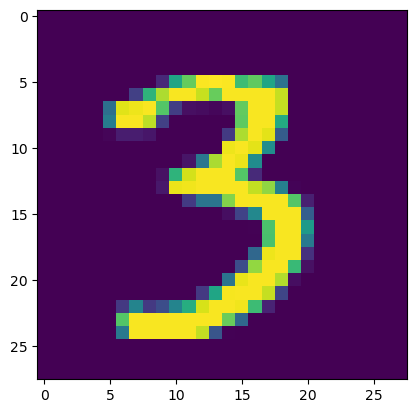

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10000])

In [9]:
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')/255
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')/255

In [11]:
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Explicitly defining the input shape
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')])

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8647 - loss: 0.4713 - val_accuracy: 0.9578 - val_loss: 0.1405
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9649 - loss: 0.1134 - val_accuracy: 0.9650 - val_loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9771 - loss: 0.0734 - val_accuracy: 0.9691 - val_loss: 0.1018
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9822 - loss: 0.0582 - val_accuracy: 0.9771 - val_loss: 0.0760
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9778 - val_loss: 0.0752
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9728 - val_loss: 0.0957
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9906 - loss: 0.0288 - val_accuracy: 0.9740 - val_loss: 0.0979
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0

In [17]:
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=2)
print('test loss:',score[0])
print('test accuracy:',score[1])

313/313 - 1s - 4ms/step - accuracy: 0.9757 - loss: 0.0998
test loss: 0.09984452277421951
test accuracy: 0.9757000207901001


In [19]:
# Model Saving
model.save('mnist.keras')

In [21]:
#Prediction
from keras.models import load_model
new_model=load_model('mnist.keras')

In [23]:
prediction=new_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [25]:
print(prediction)

[[2.9100916e-13 7.9713139e-11 4.6336616e-08 ... 9.9999952e-01
  1.2407068e-10 9.5729593e-09]
 [2.4392010e-12 9.2166601e-11 9.9999857e-01 ... 7.7907009e-16
  2.3438591e-09 1.2569855e-15]
 [4.4977710e-09 9.9996638e-01 7.1918896e-07 ... 7.5444887e-06
  1.8169312e-05 1.0060767e-08]
 ...
 [3.0187032e-13 1.9858490e-12 1.7518320e-14 ... 3.1510845e-07
  1.6302094e-08 1.3511664e-06]
 [2.8003643e-14 6.8703541e-15 3.9891736e-13 ... 8.7051834e-13
  2.2343034e-09 6.1161438e-16]
 [5.3452031e-14 2.0881412e-16 2.4587253e-15 ... 5.7351335e-18
  1.2585967e-12 5.4314749e-16]]


In [31]:
import numpy as np
print(np.argmax(prediction[7]))

9


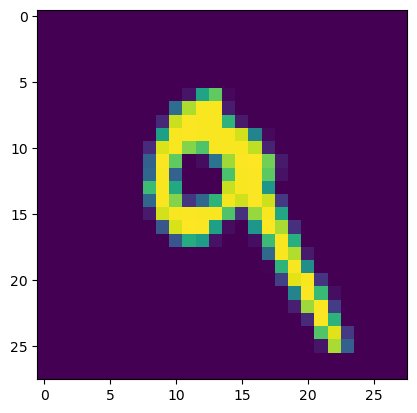

In [33]:
plt.imshow(X_test[7])
plt.show()

In [118]:
#predict on the first five images
pred=new_model.predict(X_test[35:40])
# print our model prediction
print(np.argmax(pred ,axis=1))
print(y_test[35:40])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[1 4 9 5 9]
[1 4 9 5 9]


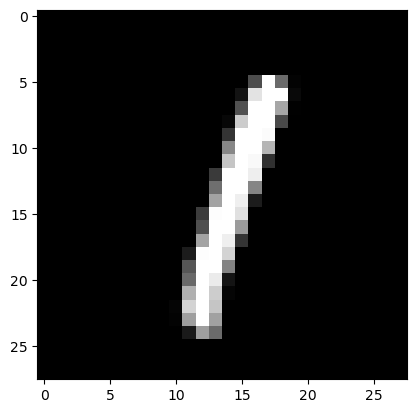

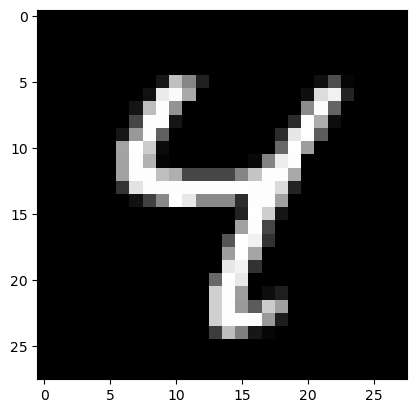

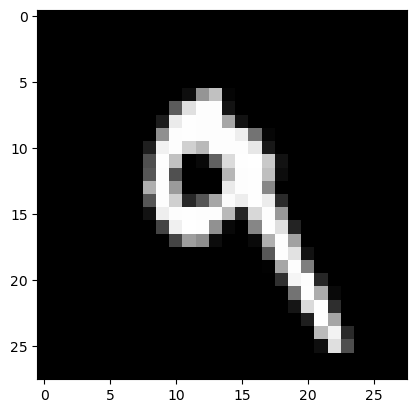

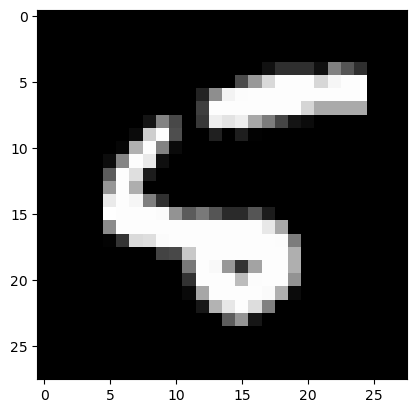

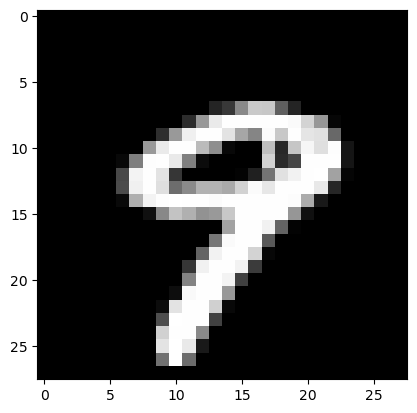

In [120]:
for i in range (5,10):
  first_img=X_test[i]
  first_img=np.array(first_img,dtype='float')
  pixels=first_img.reshape((28,28,1))
  plt.imshow(pixels, cmap='gray')
  plt.show()
     